In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#os.chdir('C:\\Users\Matthew...')
path = os.getcwd()
df = pd.read_csv("penguins_size.csv") 

In [2]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
#There's a column with . as the sex, drop this
df = df[df['sex']!='.']

#There are null values, drop them and check info
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [4]:
#Change the values of penguin species to 1, 2, and 3
def species_toFloat(cols):      
    species = cols[0]       
    if species == "Adelie":           
        return 1
    elif species == "Chinstrap":           
        return 2
    else:           
        return 3

In [5]:
df['species'] = df.apply(species_toFloat, axis=1)
print(df['species'].unique())

[1 2 3]


In [6]:
#Change the values of islands to 1, 2, and 3
def island_toFloat(cols):      
    island = cols[1]
    if island == "Torgersen":           
        return 1
    elif island == "Biscoe":           
        return 2
    else:           
        return 3

In [7]:
df['island'] = df.apply(island_toFloat, axis=1)
print(df['island'].unique())

[1 2 3]


In [8]:
#Change the values of sex to 0 or 1
def sex_toFloat(cols):      
    island = cols[6]
    if island == "MALE":           
        return 0
    else:       
        return 1

In [9]:
df['sex'] = df.apply(sex_toFloat, axis=1)
print(df['sex'].unique())

[0 1]


In [10]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,1,39.1,18.7,181.0,3750.0,0
1,1,1,39.5,17.4,186.0,3800.0,1
2,1,1,40.3,18.0,195.0,3250.0,1
4,1,1,36.7,19.3,193.0,3450.0,1
5,1,1,39.3,20.6,190.0,3650.0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   island             333 non-null    int64  
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 20.8 KB


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [13]:
scaled_data = scaler.transform(df)

In [14]:
scaled_data

array([[-1.03437424, -1.8140371 , -0.89604189, ..., -1.42675157,
        -0.56847478, -0.99103121],
       [-1.03437424, -1.8140371 , -0.82278787, ..., -1.06947358,
        -0.50628618,  1.00904996],
       [-1.03437424, -1.8140371 , -0.67627982, ..., -0.42637319,
        -1.1903608 ,  1.00904996],
       ...,
       [ 1.21691087, -0.33708269,  1.17338426, ...,  1.50292796,
         1.91906927, -0.99103121],
       [ 1.21691087, -0.33708269,  0.22108196, ...,  0.78837197,
         1.23499466,  1.00904996],
       [ 1.21691087, -0.33708269,  1.08181673, ...,  0.85982757,
         1.48374906, -0.99103121]])

In [15]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [16]:
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(333, 7)
(333, 2)


Text(0, 0.5, 'Second principal component')

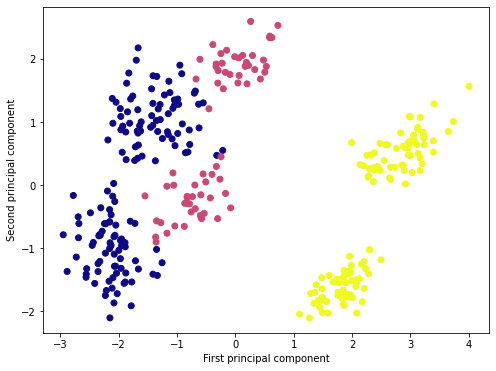

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=df['species'], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [18]:
#interpreting the components
# cost of PCA is not being able to easliy understand what these components represent
pca.components_

array([[ 0.49064302, -0.05951661,  0.39691507, -0.34415029,  0.49367464,
         0.46920217, -0.12601932],
       [-0.14139477,  0.27995089,  0.30142144,  0.54694421,  0.01200229,
         0.12794063, -0.70364714]])

In [19]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


<AxesSubplot:>

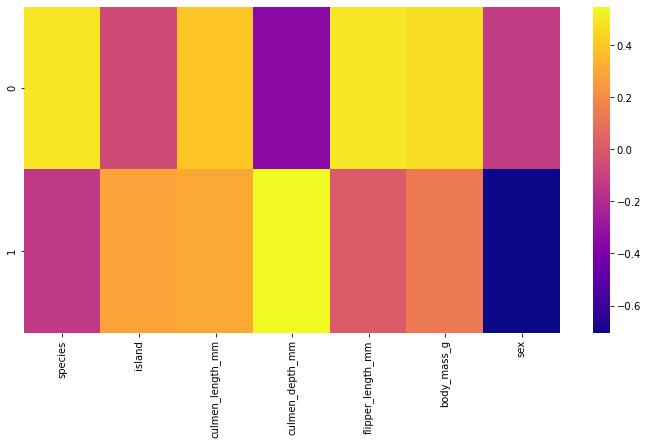

In [20]:
print(df.columns)
df_comp = pd.DataFrame(pca.components_, columns=df.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma')

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

In [22]:
features = pca.components_

In [23]:
y = np.array(df.species).reshape(-1, 1)

In [24]:
# we have 2 classes so the labels will have 2 values
# first class: (1,0) second class: (0,1)
encoder = OneHotEncoder()
targets = encoder.fit_transform(y).toarray()

In [25]:
train_features, test_features, train_targets, test_targets = train_test_split(x_pca, targets, test_size=0.2)
x_pca
#features2 = df[["income", "age", "loan"]]
#features2

array([[-1.87007647e+00,  4.02825452e-01],
       [-1.65995729e+00, -1.33181216e+00],
       [-1.71030882e+00, -1.20055631e+00],
       [-2.15335930e+00, -1.00755762e+00],
       [-1.92896453e+00,  9.34179992e-01],
       [-2.05208696e+00, -1.28580342e+00],
       [-9.86657896e-01,  8.17892849e-01],
       [-2.06991165e+00, -1.28676626e+00],
       [-1.96204982e+00,  1.08716384e+00],
       [-1.63822440e+00,  9.40025072e-01],
       [-2.03440001e+00, -1.39740014e+00],
       [-1.88492162e+00, -9.78889426e-01],
       [-9.70887987e-01,  1.27990194e+00],
       [-2.55345031e+00, -1.41247551e+00],
       [-1.13739899e+00,  1.64532321e+00],
       [-2.68569779e+00, -8.35775851e-01],
       [-2.18255737e+00,  7.14292016e-01],
       [-2.21876131e+00, -6.13795203e-01],
       [-1.66056473e+00,  6.34978277e-01],
       [-1.72334369e+00,  3.89595099e-01],
       [-2.28041846e+00, -7.32079689e-01],
       [-1.87760802e+00,  8.41174629e-01],
       [-2.07755724e+00, -8.18675172e-01],
       [-2.

In [26]:
model = Sequential()
model.add(Dense(10, input_dim=2, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

In [27]:
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [30]:
model.fit(train_features, train_targets, batch_size = 20, epochs=50, verbose=2)
results = model.evaluate(test_features, test_targets, use_multiprocessing=True)

print("Training is finished... The loss and accuracy values are:")
print(results)

Epoch 1/50
14/14 - 0s - loss: 0.3519 - accuracy: 0.8759
Epoch 2/50
14/14 - 0s - loss: 0.3497 - accuracy: 0.8759
Epoch 3/50
14/14 - 0s - loss: 0.3476 - accuracy: 0.8797
Epoch 4/50
14/14 - 0s - loss: 0.3454 - accuracy: 0.8797
Epoch 5/50
14/14 - 0s - loss: 0.3435 - accuracy: 0.8759
Epoch 6/50
14/14 - 0s - loss: 0.3414 - accuracy: 0.8759
Epoch 7/50
14/14 - 0s - loss: 0.3398 - accuracy: 0.8759
Epoch 8/50
14/14 - 0s - loss: 0.3374 - accuracy: 0.8797
Epoch 9/50
14/14 - 0s - loss: 0.3355 - accuracy: 0.8797
Epoch 10/50
14/14 - 0s - loss: 0.3337 - accuracy: 0.8835
Epoch 11/50
14/14 - 0s - loss: 0.3318 - accuracy: 0.8872
Epoch 12/50
14/14 - 0s - loss: 0.3299 - accuracy: 0.8910
Epoch 13/50
14/14 - 0s - loss: 0.3282 - accuracy: 0.8872
Epoch 14/50
14/14 - 0s - loss: 0.3262 - accuracy: 0.8872
Epoch 15/50
14/14 - 0s - loss: 0.3244 - accuracy: 0.8872
Epoch 16/50
14/14 - 0s - loss: 0.3229 - accuracy: 0.8910
Epoch 17/50
14/14 - 0s - loss: 0.3212 - accuracy: 0.8910
Epoch 18/50
14/14 - 0s - loss: 0.3194 - 